In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

primero normalizamos los datos


In [102]:
data = pd.read_csv('./diamonds.csv')

X = data[['carat','depth','table','x','y','z']]
y = data['price']

m= y.size



In [103]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [104]:
print(X)

       carat  depth  table     x     y     z
0       0.23   61.5   55.0  3.95  3.98  2.43
1       0.21   59.8   61.0  3.89  3.84  2.31
2       0.23   56.9   65.0  4.05  4.07  2.31
3       0.29   62.4   58.0  4.20  4.23  2.63
4       0.31   63.3   58.0  4.34  4.35  2.75
...      ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0  5.75  5.76  3.50
53936   0.72   63.1   55.0  5.69  5.75  3.61
53937   0.70   62.8   60.0  5.66  5.68  3.56
53938   0.86   61.0   58.0  6.15  6.12  3.74
53939   0.75   62.2   55.0  5.83  5.87  3.64

[53940 rows x 6 columns]


In [105]:
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [106]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [107]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       carat  depth  table     x     y     z
0       0.23   61.5   55.0  3.95  3.98  2.43
1       0.21   59.8   61.0  3.89  3.84  2.31
2       0.23   56.9   65.0  4.05  4.07  2.31
3       0.29   62.4   58.0  4.20  4.23  2.63
4       0.31   63.3   58.0  4.34  4.35  2.75
...      ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0  5.75  5.76  3.50
53936   0.72   63.1   55.0  5.69  5.75  3.61
53937   0.70   62.8   60.0  5.66  5.68  3.56
53938   0.86   61.0   58.0  6.15  6.12  3.74
53939   0.75   62.2   55.0  5.83  5.87  3.64

[53940 rows x 6 columns]
Media calculada: carat     0.797940
depth    61.749405
table    57.457184
x         5.731157
y         5.734526
z         3.538734
dtype: float64
Desviación estandar calculada: carat    0.474007
depth    1.432608
table    2.234470
x        1.121750
y        1.142124
z        0.705692
dtype: float64
          carat     depth     table         x         y         z
0     -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -1.571129
1 

In [108]:

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.19816781 -0.17409151 ... -1.58783745 -1.53619556
  -1.57112919]
 [ 1.         -1.24036129 -1.36073849 ... -1.64132529 -1.65877419
  -1.74117497]
 [ 1.         -1.19816781 -3.38501862 ... -1.49869105 -1.45739502
  -1.74117497]
 ...
 [ 1.         -0.20662095  0.73334442 ... -0.06343409 -0.04774083
   0.03013526]
 [ 1.          0.13092691 -0.52310533 ...  0.37338325  0.33750627
   0.28520393]
 [ 1.         -0.10113725  0.31452784 ...  0.08811478  0.11861587
   0.14349912]]


In [109]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [110]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

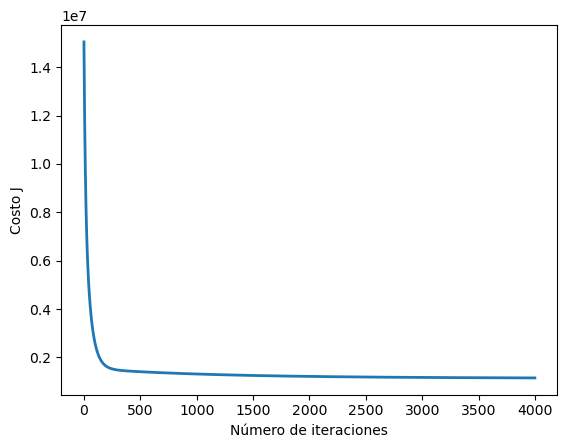

theta calculado por el descenso por el gradiente: [3932.79972191 4022.408743   -206.05840654 -227.49377522   -5.0707635
 -127.99943396 -212.15286266]
El precio predicho para el diamante de ejemplo (usando el descenso por el gradiente): $531


In [ ]:

alpha = 0.01
num_iters = 4000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])  # ahora es del tamaño correcto (7 columnas)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un diamante de ejemplo
X_array = [0.30, 61.5, 55.0, 3.95, 3.98, 2.43]  # ejemplo de diamante
X_array = (np.array(X_array) - mu) / sigma  # normaliza
X_array = np.insert(X_array, 0, 1)  # agrega el 1 para el bias

price = np.dot(X_array, theta)  # predicción

print('El precio predicho para el diamante de ejemplo (usando el descenso por el gradiente): ${:.0f}'.format(price))
